<a href="https://colab.research.google.com/github/rosshalpin/EngineeringProject/blob/main/EngineeringProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/EngProjV2/

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/EngProjV2


In [2]:
!pip install opencv-contrib-python --upgrade

In [3]:
%cd /mydrive/EngProjV2/

/content/gdrive/My Drive/EngProjV2


In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [34]:
Conf_threshold = 0.5
NMS_threshold = 0.1
COLORS = [(0, 255, 0)]

class_name = ["cereal"]
net = cv2.dnn.readNet('/mydrive/EngProjV2/yolov4.weights', '/mydrive/EngProjV2/yolov4.cfg')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
model = cv2.dnn_DetectionModel(net)

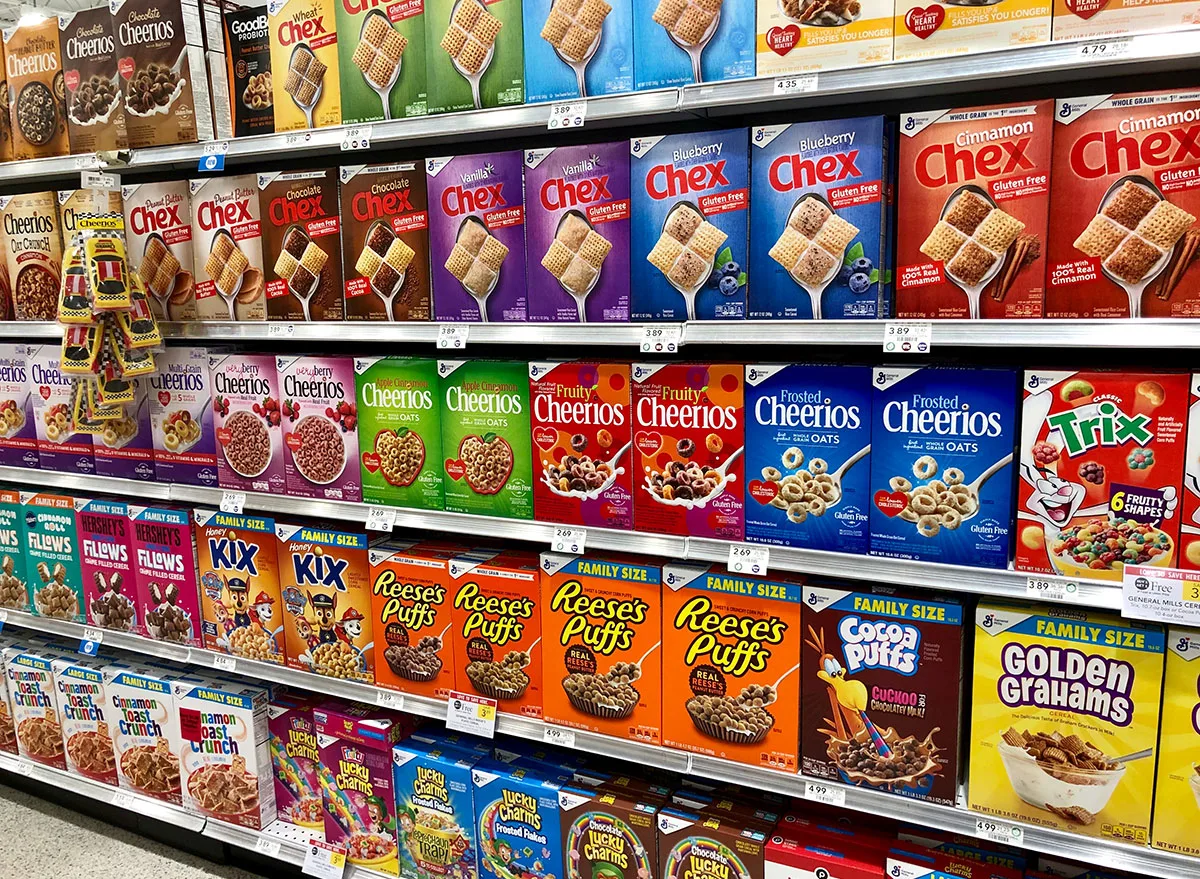

In [40]:
model.setInputParams(size=(1024, 1024), scale=1/255, swapRB=True)

orig_frame = cv2.imread("cereal-aisle.jpg")

O_WIDTH = orig_frame.shape[0]
O_HEIGHT = orig_frame.shape[1]


#frame = cv2.resize(orig_frame, [int(O_HEIGHT*.1),int(O_WIDTH*.1)], interpolation= cv2.INTER_LINEAR)
frame = orig_frame.copy()

WIDTH = frame.shape[0]
HEIGHT = frame.shape[1]

classes, scores, boxes = model.detect(frame, Conf_threshold, NMS_threshold)

# new_frame = frame.copy()
# for (classid, score, box) in zip(classes, scores, boxes):
#   # if list(box) == list(nearest_box["box"]):
#   # print(box)
#   color = COLORS[int(classid) % len(COLORS)]
#   label = "%s : %f" % (class_name[0], score)
#   cv2.rectangle(new_frame, box, color, 1)
#   cv2.putText(new_frame, label, (box[0], box[1]-10),
#               cv2.FONT_HERSHEY_PLAIN, 1, color, 1)
#   # cv2.imwrite("object-detection.jpg", frame)
# cv2_imshow(new_frame)
cv2_imshow(frame)

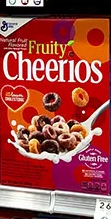

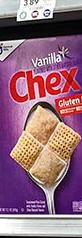

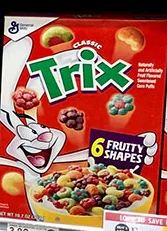

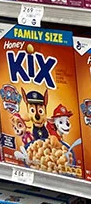

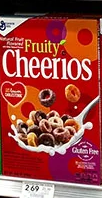

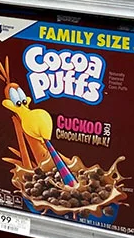

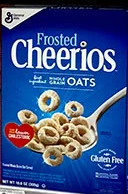

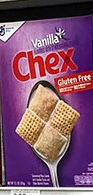

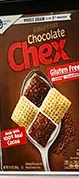

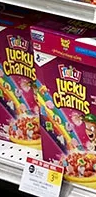

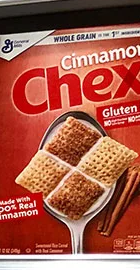

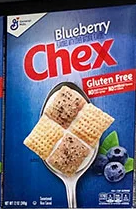

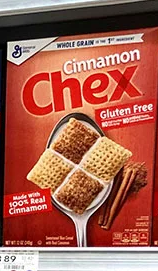

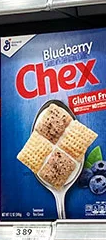

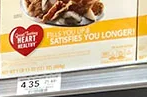

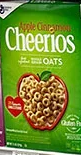

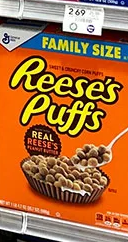

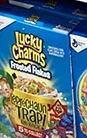

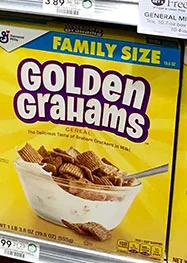

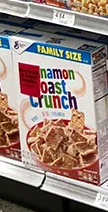

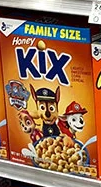

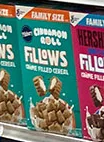

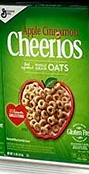

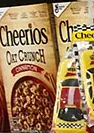

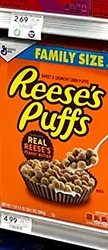

In [36]:
individual_boxes = []

for box in boxes:
  x = box[0]
  y = box[1]
  w = box[2]
  h = box[3]
  individual_box = frame[y:y+h,x:x+w]
  individual_boxes.append(individual_box)
  cv2_imshow(individual_box)

In [ ]:
# from scipy.spatial import distance

# center_x = WIDTH/2
# center_y = HEIGHT/2


# nearest_box = {
#   "dist": 10000000
# }

# for box in boxes:

#   a = (center_y, center_x)
#   b = (box[1], box[0])

#   new_dist = distance.euclidean(b, a)
#   # print(new_dist)
#   if new_dist < nearest_box["dist"]:
#     nearest_box["dist"] = new_dist
#     nearest_box["box"] = box


# print(nearest_box)

In [17]:
import numpy as np
import cv2 as cv

MIN_MATCH_COUNT = 200
orig_img1 = cv.imread('reeses.jpg')  # queryImage
img1 = cv2.cvtColor(orig_img1, cv2.COLOR_BGR2GRAY)
# img2 = cv.imread('cereal-aisle.jpg', 0)  # trainImage

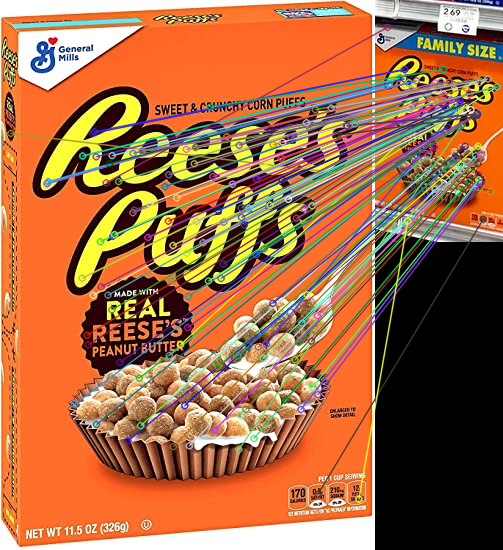

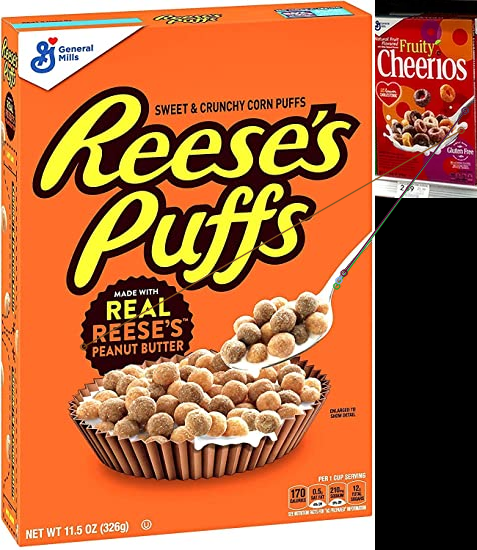

In [39]:
for frame in [individual_boxes[16],individual_boxes[4]]:
  img2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Initiate SIFT detector
  sift = cv.xfeatures2d.SIFT_create()
  # find the key points and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1, None)
  kp2, des2 = sift.detectAndCompute(img2, None)
  index_params = dict(algorithm=1, trees=5)
  search_params = dict(checks=20)
  flann = cv.FlannBasedMatcher(index_params, search_params)
  matches = flann.knnMatch(des1, des2, k=2)

  good = []
  for m, n in matches:
      if m.distance < 0.7*n.distance:
          good.append(m)
  img3 = cv.drawMatches(orig_img1, kp1, frame, kp2, good, None, flags=2)
  cv2_imshow(img3)